{'fdcId': 454004, 'description': 'APPLE', 'dataType': 'Branded', 'gtinUpc': '867824000001', 'publishedDate': '2019-04-01', 'brandOwner': 'TREECRISP 2 GO', 'ingredients': 'CRISP APPLE.', 'marketCountry': 'United States', 'foodCategory': 'Pre-Packaged Fruit & Vegetables', 'modifiedDate': '2017-07-14', 'dataSource': 'LI', 'servingSizeUnit': 'g', 'servingSize': 154.0, 'householdServingFullText': '5.5 ONZ', 'tradeChannels': ['NO_TRADE_CHANNEL'], 'allHighlightFields': '<b>Ingredients</b>: CRISP <em>APPLE</em>.', 'score': 1070.237, 'microbes': [], 'foodNutrients': [{'nutrientId': 1087, 'nutrientName': 'Calcium, Ca', 'nutrientNumber': '301', 'unitName': 'MG', 'derivationCode': 'LCCD', 'derivationDescription': 'Calculated from a daily value percentage per serving size measure', 'derivationId': 75, 'value': 0.0, 'foodNutrientSourceId': 9, 'foodNutrientSourceCode': '12', 'foodNutrientSourceDescription': "Manufacturer's analytical; partial documentation", 'rank': 5300, 'indentLevel': 1, 'foodNutri

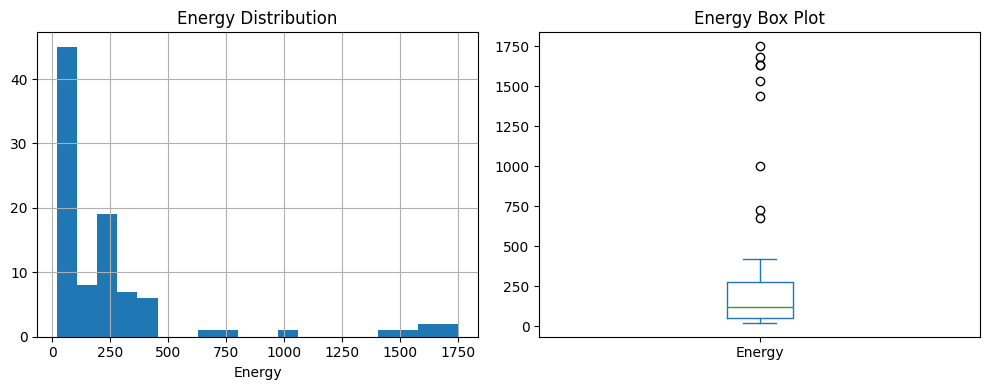


Nutrient correlations:
                                Calcium, Ca  Iron, Fe  Sodium, Na  \
Calcium, Ca                        1.000000  0.950895    0.231359   
Iron, Fe                           0.950895  1.000000    0.223073   
Sodium, Na                         0.231359  0.223073    1.000000   
Vitamin A, IU                      0.174368  0.128498    0.482712   
Vitamin C, total ascorbic acid    -0.042232 -0.029165   -0.078737   
...                                     ...       ...         ...   
PUFA 20:3 n-6                           NaN       NaN         NaN   
Citric acid                             NaN       NaN         NaN   
Malic acid                              NaN       NaN         NaN   
Oxalic acid                             NaN       NaN         NaN   
Quinic acid                             NaN       NaN         NaN   

                                Vitamin A, IU  Vitamin C, total ascorbic acid  \
Calcium, Ca                          0.174368                     

<Figure size 800x600 with 0 Axes>

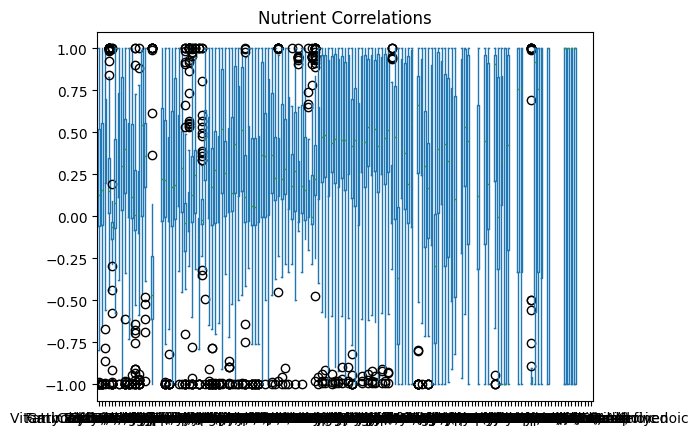


Missing values:
description       0
foodCode          0
dataType          0
Calcium, Ca       1
Iron, Fe          1
                 ..
PUFA 20:3 n-6    98
Citric acid      99
Malic acid       99
Oxalic acid      99
Quinic acid      99
Length: 152, dtype: int64


In [9]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv
load_dotenv()


api_key = os.getenv('USDA_API_KEY')
url = "https://api.nal.usda.gov/fdc/v1/foods/search"

params = {
    'query': 'apple',
    'pageSize': 100,
    'api_key': api_key
}

# r = requests.get(url, params=params)
# foods = r.json()['foods']
# print(foods)

r = requests.get(url, params=params)

## Debug: print the raw response
# print("Status code:", r.status_code)
# print("Response text:", r.text[:500])  # First 500 chars
# print("Headers:", r.headers)

# # Only try to parse JSON if status is 200
# if r.status_code == 200:
#     data = r.json()
#     foods = data.get('foods', [])
#     print(f"Found {len(foods)} foods")
#     print(foods[:2])  # Print first 2
# else:
#     print("API error:", r.text)







foods_raw = r.json()['foods']

# Flatten the data into a DataFrame
# Extract basic info from each food
food_list = []
for food in foods_raw:
    food_dict = {
        'description': food.get('description', ''),
        'foodCode': food.get('foodCode', ''),
        'dataType': food.get('dataType', '')
    }
    print(food)
    # Extract nutrients if available
    if 'foodNutrients' in food:
        for nutrient in food['foodNutrients']:
            name = nutrient.get('nutrientName', '')
            value = nutrient.get('value', 0)
            food_dict[name] = value
    
    food_list.append(food_dict)

df = pd.DataFrame(food_list)

# Basic EDA
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nBasic statistics:")
print(df.describe())

# Find numeric columns (nutrients)
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot distributions of key nutrients if they exist
if 'Energy' in df.columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    df['Energy'].hist(bins=20)
    plt.title('Energy Distribution')
    plt.xlabel('Energy')
    
    plt.subplot(1, 2, 2)
    df['Energy'].plot(kind='box')
    plt.title('Energy Box Plot')
    plt.tight_layout()
    plt.show()

# Correlation between nutrients (if you have multiple)
if len(numeric_cols) > 1:
    print("\nNutrient correlations:")
    print(df[numeric_cols].corr())
    
    # Plot correlation heatmap
    plt.figure(figsize=(8, 6))
    df[numeric_cols].corr().plot(kind='box')
    plt.title('Nutrient Correlations')
    plt.show()

print("\nMissing values:")
print(df.isnull().sum())